In [21]:
import os
import glob
import random
import sys
# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
# srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'


# sys.path.append(srcdir)

import matplotlib.pyplot as plt
import pandas as pd
import celldancer.cdplt as cdplt




In [1]:
import sys
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
sys.path.append(srcdir)
import pandas as pd
import sys
from celldancer.cdplt import colormap
from celldancer import velocity_estimation
import os

In [2]:
raw_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv'
load_raw_data=pd.read_csv(raw_path)
load_raw_data

,gene_name,u0,s0,cellID,clusters,embedding1,embedding2
0,Sox17,0.000000,0.043971,cell_363,Blood progenitors 2,3.460521,15.574629
1,Sox17,0.000000,0.000000,cell_382,Blood progenitors 2,2.490433,14.971734
2,Sox17,0.000000,0.018161,cell_385,Blood progenitors 2,2.351203,15.267069
3,Sox17,0.000000,0.000000,cell_393,Blood progenitors 2,5.899098,14.388825
4,Sox17,0.000000,0.000000,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...
24657995,Gm47283,0.214961,1.145533,cell_139318,Erythroid3,8.032358,7.603037
24657996,Gm47283,0.300111,1.072944,cell_139321,Erythroid3,10.352904,6.446736
24657997,Gm47283,0.292607,1.199875,cell_139326,Erythroid3,9.464873,7.261099
24657998,Gm47283,0.266031,1.114659,cell_139327,Erythroid3,9.990495,7.243880


# parallel

In [20]:
%load_ext autoreload
%autoreload 2

max_epoches=200
check_n_epoch=10
learning_rate=0.001
downsample_method='neighbors'
step_i=200
step_j=200
sampling_ratio=0.125
n_neighbors=30
optimizer='Adam'
n_neighbors_downsample=30
auto_downsample=True
auto_norm_u_s=True
cost_type='smooth'
smooth_weight=0.1
patience=3
binning=True
gene_choice=load_raw_data.gene_name.drop_duplicates()
# gene_choice=[list(load_raw_data.gene_name.drop_duplicates())[564]]
print(gene_choice)
folder_name=("epoch"+str(max_epoches)+"check_n"+str(check_n_epoch)+"Lr"+str(learning_rate)+"Down"+str(downsample_method)+"_"+str(step_i)+"_"+str(step_j)+"Ratio"+str(sampling_ratio)+"N"+str(n_neighbors)+"O"+str(optimizer)+"nD"+str(n_neighbors_downsample)+"autoD"+str(auto_downsample)+"autoN"+str(auto_norm_u_s)+"costT"+str(cost_type)+"smoW"+str(smooth_weight)+"p"+str(patience)+"bin"+str(binning))

result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/tunning_train/'+folder_name+'/'
#os.mkdir(result_path)
brief, load_cellDancer=velocity_estimation.train(load_raw_data,\
                                                 gene_choice=gene_choice,\
                                                 max_epoches=max_epoches,\
                                                 check_n_epoch=check_n_epoch,\
                                                 learning_rate=learning_rate, \
                                                 downsample_method=downsample_method,\
                                                 step_i=step_i,\
                                                 step_j=step_j,\
                                                 sampling_ratio=sampling_ratio,\
                                                 n_neighbors=n_neighbors,\
                                                 optimizer=optimizer,\
                                                 n_neighbors_downsample=n_neighbors_downsample,\
                                                 auto_downsample=auto_downsample,\
                                                 auto_norm_u_s=auto_norm_u_s,\
                                                 cost_type=cost_type,\
                                                 smooth_weight=smooth_weight,\
                                                 patience=patience,\
                                                 binning=binning,\
                                                 result_path=result_path,n_jobs=40)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0             Sox17
12329         Tram1
24658       Fam135a
36987         Uggt1
49316          Rev1
             ...   
24596355      Gpm6b
24608684        Uty
24621013      Ddx3y
24633342    Eif2s3y
24645671    Gm47283
Name: gene_name, Length: 2000, dtype: object
Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/tunning_train/epoch200check_n10Lr0.001Downneighbors_200_200Ratio0.125N30OAdamnD30autoDTrueautoNTruecostTsmoothsmoW0.1p3binTrue/cell_dancer_velocity_2022-05-03 18-49-21 as the output path.


Velocity Estimation: 100%|██████████████████████| 50/50 [17:30<00:00, 21.01s/it]


In [38]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2,pseudotime
0,0,Ift81,0.026321,0.010658,0.029678,0.009281,0.024614,0.043046,0.072913,0.039428,cell_363,Blood progenitors 2,3.460521,15.574629,0,NaN,NaN,0.485763
1,1,Ift81,0.044266,0.000000,0.037986,0.000994,0.021712,0.043374,0.073363,0.039428,cell_382,Blood progenitors 2,2.490433,14.971734,1,NaN,NaN,0.419016
2,2,Ift81,0.064559,0.000000,0.055336,0.000936,0.020447,0.043307,0.073875,0.039428,cell_385,Blood progenitors 2,2.351203,15.267069,2,NaN,NaN,0.425629
3,3,Ift81,0.020756,0.000000,0.017835,0.001063,0.023218,0.043451,0.072763,0.039428,cell_393,Blood progenitors 2,5.899098,14.388825,3,NaN,NaN,0.708286
4,4,Ift81,0.013184,0.000000,0.011334,0.001085,0.023697,0.043477,0.072567,0.039428,cell_398,Blood progenitors 2,4.823139,15.374831,4,NaN,NaN,0.612927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,1.128435,0.000000,1.126852,0.000080,0.003006,0.043029,0.008092,0.052719,cell_139318,Erythroid3,8.032358,7.603037,12324,NaN,NaN,0.936389
24657996,12325,Mcrip1,0.970672,0.024356,1.468201,0.015411,0.009476,0.040149,0.009596,0.052719,cell_139321,Erythroid3,10.352904,6.446736,12325,NaN,NaN,0.967583
24657997,12326,Mcrip1,0.899107,0.000000,0.897765,0.000097,0.003658,0.042447,0.008614,0.052719,cell_139326,Erythroid3,9.464873,7.261099,12326,NaN,NaN,0.948529
24657998,12327,Mcrip1,1.398107,0.017375,1.764710,0.010764,0.006875,0.041571,0.008628,0.052719,cell_139327,Erythroid3,9.990495,7.243880,12327,NaN,NaN,0.949595


In [39]:
load_cellDancer=load_cellDancer.drop(['velocity1', 'velocity2','index','pseudotime'], axis=1)

In [40]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Ift81,0.026321,0.010658,0.029678,0.009281,0.024614,0.043046,0.072913,0.039428,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Ift81,0.044266,0.000000,0.037986,0.000994,0.021712,0.043374,0.073363,0.039428,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Ift81,0.064559,0.000000,0.055336,0.000936,0.020447,0.043307,0.073875,0.039428,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Ift81,0.020756,0.000000,0.017835,0.001063,0.023218,0.043451,0.072763,0.039428,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Ift81,0.013184,0.000000,0.011334,0.001085,0.023697,0.043477,0.072567,0.039428,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,1.128435,0.000000,1.126852,0.000080,0.003006,0.043029,0.008092,0.052719,cell_139318,Erythroid3,8.032358,7.603037
24657996,12325,Mcrip1,0.970672,0.024356,1.468201,0.015411,0.009476,0.040149,0.009596,0.052719,cell_139321,Erythroid3,10.352904,6.446736
24657997,12326,Mcrip1,0.899107,0.000000,0.897765,0.000097,0.003658,0.042447,0.008614,0.052719,cell_139326,Erythroid3,9.464873,7.261099
24657998,12327,Mcrip1,1.398107,0.017375,1.764710,0.010764,0.006875,0.041571,0.008628,0.052719,cell_139327,Erythroid3,9.990495,7.243880


## Set Parameters

In [41]:
n_neighbors=50 #100
downsample_step=(60,60)

grid=(20,20)
dt = 0.01
t_total = 10000
n_repeats = 10

## compute_cell_velocity

In [42]:
from celldancer.compute_cell_velocity import compute_cell_velocity

gene_choice=list(set(load_cellDancer.gene_name))
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode="gene",
              transfer_mode='power10',
              n_neighbors=n_neighbors,
              step=downsample_step)

(genes, cells): (2000, 12329)
After downsampling, there are  432 cells.


## Estimate pseudotime

There are 2 clusters.
[0 1]



cluster  0
MAX allowed zero time cells are:  16
52  cells left.
Sampling new trajs for zero-time cells in cluster  0   ...



cluster  0
MAX allowed zero time cells are:  16
31  cells left.
Sampling new trajs for zero-time cells in cluster  0   ...



cluster  0
MAX allowed zero time cells are:  16
Only  13  cells left. Stopping.
[57, 95, 143, 148, 154, 159, 180, 270, 278, 331, 362, 384, 393]

 Display reference paths for cluster 0


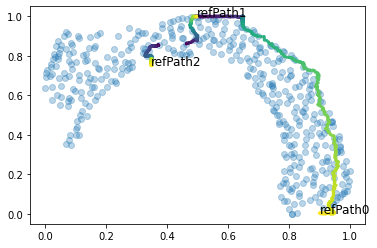


 For cluster  0

intercluster cell time adjustment
number of cells:  320
cut off is  0.06520611995298027
number of nodes:  3

Consolidating time between clusters  0  and  1 ..
pair_cellIDs:  (158, 98)
pair_cellIDs:  (330, 111)
pair_cellIDs:  (49, 301)
pair_cellIDs:  (353, 14)
pair_cellIDs:  (11, 100)
pair_cellIDs:  (18, 59)
pair_cellIDs:  (216, 318)

 peak mode:  most_frequent_shift


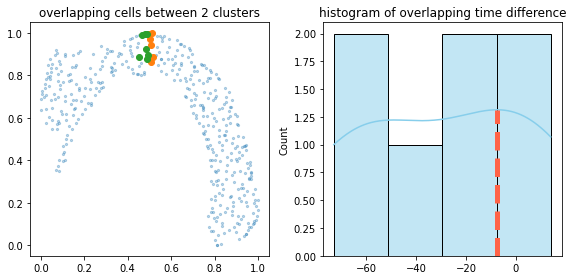

shift time is:  -8 .
The overlapping cells are: 
cell  49  from cluster  0  and  301  from cluster  1

Consolidating time between clusters  0  and  2 ..
pair_cellIDs:  (216, 331)
pair_cellIDs:  (330, 393)

 peak mode:  least_shift
shift time is:  15 .
The overlapping cells are: 
cell  216  from cluster  0  and  331  from cluster  2

Consolidating time between clusters  1  and  2 ..
pair_cellIDs:  (318, 331)
pair_cellIDs:  (238, 179)
pair_cellIDs:  (62, 95)
pair_cellIDs:  (10, 159)
pair_cellIDs:  (320, 393)
pair_cellIDs:  (12, 172)
pair_cellIDs:  (111, 278)
pair_cellIDs:  (160, 7)

 peak mode:  most_frequent_shift


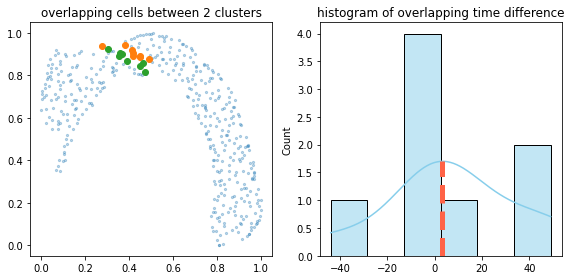

shift time is:  0 .
The overlapping cells are: 
cell  318  from cluster  1  and  331  from cluster  2


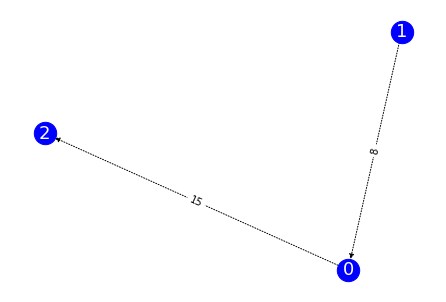




cluster  1
MAX allowed zero time cells are:  10
10  cells left.
Sampling new trajs for zero-time cells in cluster  1   ...



cluster  1
MAX allowed zero time cells are:  10
Only  3  cells left. Stopping.
[163, 249, 250]

 Display reference paths for cluster 1


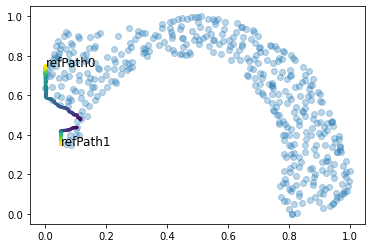


 For cluster  1

intercluster cell time adjustment
number of cells:  112
cut off is  0.03869348612082058
number of nodes:  2

Consolidating time between clusters  0  and  1 ..
pair_cellIDs:  (242, 249)

 peak mode:  least_shift
shift time is:  26 .
The overlapping cells are: 
cell  242  from cluster  0  and  249  from cluster  1


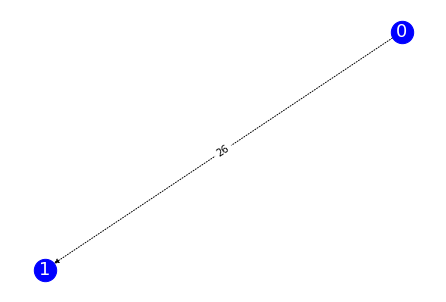




All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  432
cut off is  0.0719157544841402
number of nodes:  2

Consolidating time between clusters  0  and  1 ..
pair_cellIDs:  (139, 25)
pair_cellIDs:  (19, 8)
pair_cellIDs:  (161, 171)
pair_cellIDs:  (210, 157)

 peak mode:  least_shift
shift time is:  -115 .
The overlapping cells are: 
cell  161  from cluster  0  and  171  from cluster  1


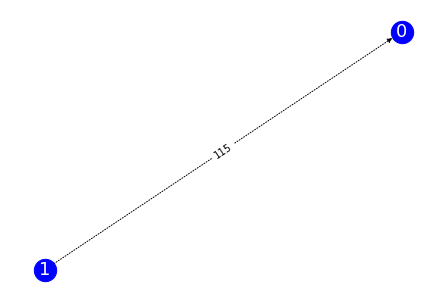



All inter cluster cell time has been resolved.



There are 12329 cells.
--- 14.979598045349121 seconds ---


In [45]:
#import importlib
#importlib.reload(sys.modules['pseudo_time'])
from celldancer.pseudo_time import pseudo_time


cell_time = dict()
dt = 0.01
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (20,20)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], n_repeats, downsample_step)

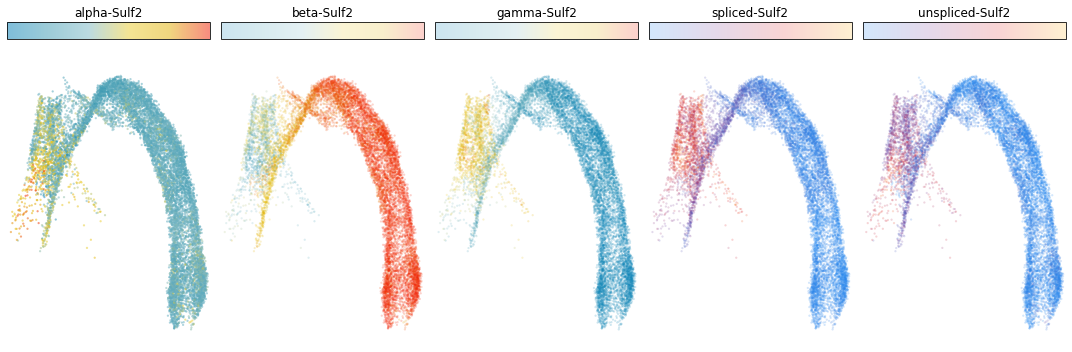

In [27]:
fig, ax = plt.subplots(ncols=5, figsize=(15,5))
gene = 'Sulf2'
cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
cdplt.cell.scatter_cell(ax[3],load_cellDancer, colors='spliced', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
cdplt.cell.scatter_cell(ax[4],load_cellDancer, colors='unspliced', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
ax[3].set_title('spliced-'+gene)
ax[4].set_title('unspliced-'+gene)
plt.tight_layout()
plt.show()

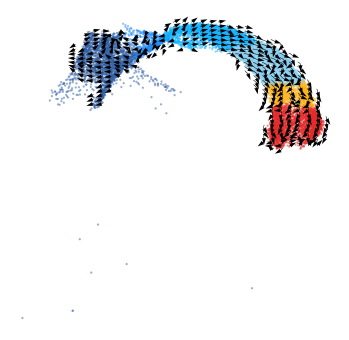

In [43]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors=cdplt.colormap.colormap_erythroid, alpha=0.5, 
             gene_name=gene, velocity=True)
ax.axis('off')
plt.show()

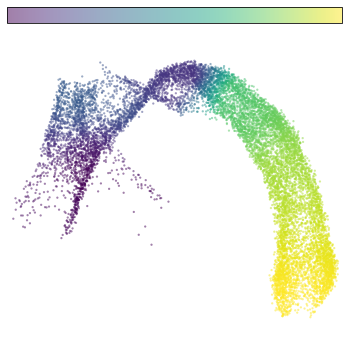

In [46]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

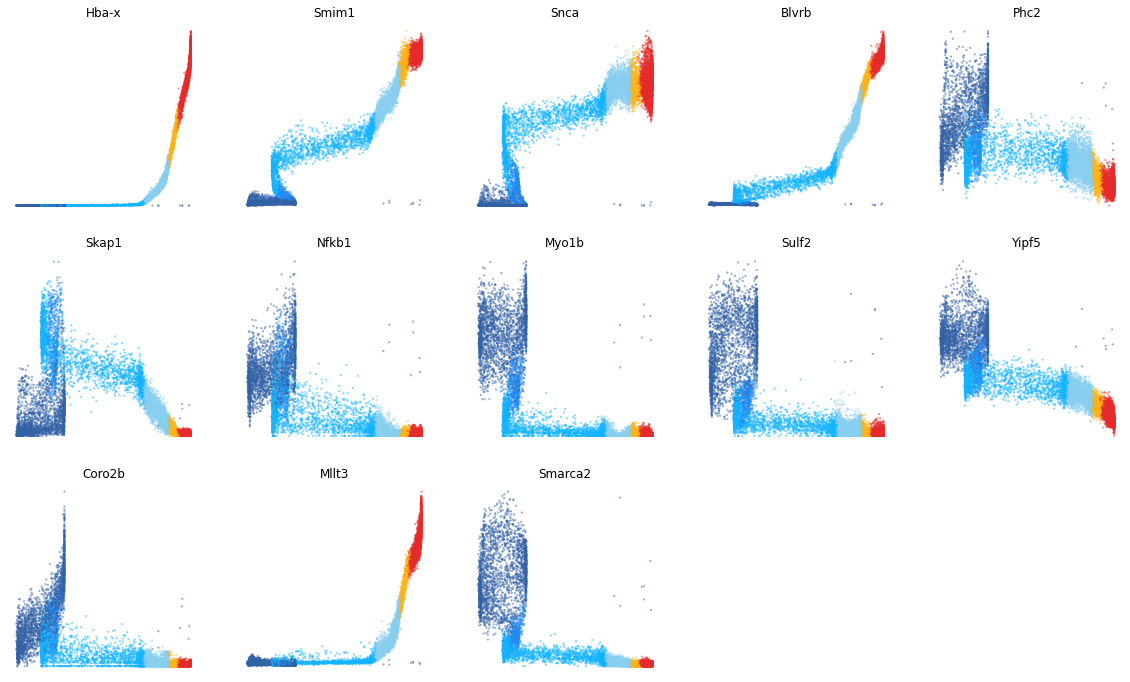

In [47]:
ncols=5
fig = plt.figure(figsize=(20,12))

load_cellDancer
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()



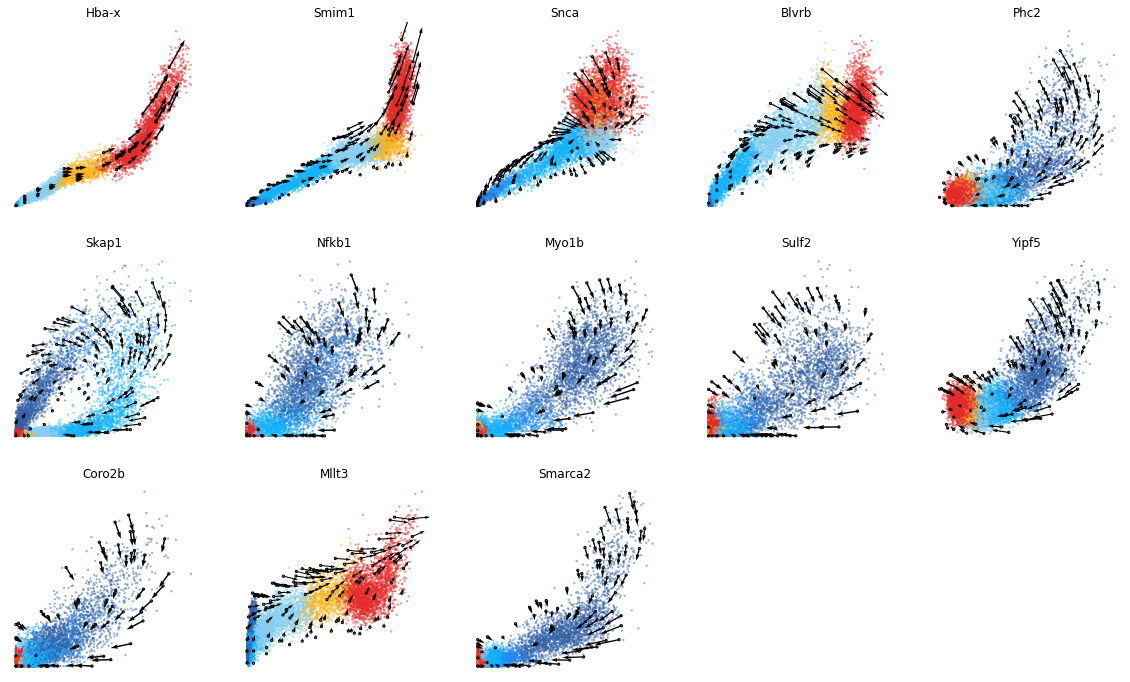

In [35]:
ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()